## Import the necessary libraries

In [14]:
import pandas as pd
import numpy as np 
import scipy.stats as stats
import matplotlib.pyplot as plt 
import seaborn as sns

## Step 1 : import Dataset 

In [2]:
sale_df = pd.read_csv('sale_data.csv')
sale_df.head()

,Unnamed: 0,product_id,product_name,category,unit_sold,sale_date
0,0,1,Product 1,Home,25,2023-01-01
1,1,2,Product 2,Sports,15,2023-01-02
2,2,3,Product 3,Electronics,17,2023-01-03
3,3,4,Product 4,Home,19,2023-01-04
4,4,5,Product 5,Home,21,2023-01-05


In [3]:
sale_df.shape

(20, 6)

## Step 2 : Descriptive Stats Summary 

In [11]:
df_describe = sale_df['unit_sold'].describe()

# Additional Stats summary 
mean_unit_sold = sale_df['unit_sold'].mean()
median_unit_sold = sale_df['unit_sold'].median()
mode_unit_sold = sale_df['unit_sold'].mode()[0]
variance_unit_sold = sale_df['unit_sold'].var()
std_unit_sold = sale_df['unit_sold'].std()


print(f"Descriptive Summary of unit sold : {df_describe}")
print()
print('Statistical Analysis :')
print(f'Mean of unit sold : {mean_unit_sold}')
print(f'Median of unit sold : {median_unit_sold} ')
print(f'Mode of unit sold : {mode_unit_sold} ')
print(f'Variance of unit sold : {variance_unit_sold} ')
print(f'Standard Deviation of unit sold : {std_unit_sold} ')

Descriptive Summary of unit sold : count    20.000000
mean     18.800000
std       3.302312
min      13.000000
25%      17.000000
50%      18.500000
75%      21.000000
max      25.000000
Name: unit_sold, dtype: float64

Statistical Analysis :
Mean of unit sold : 18.8
Median of unit sold : 18.5 
Mode of unit sold : 17 
Variance of unit sold : 10.90526315789474 
Standard Deviation of unit sold : 3.3023117899275864 


## Step 3 : Calculate Confidence Interval 

#### confidence_interval = (mean - margin_error , mean + margin_error)

#### margin_error = t_score * standard_error 
#### standard_error = standard deviation / root of number of data points (square root of n) 
#### t_score = ((1 + confidence_level)/2 , degree_of_freedom)
#### degree of freedom = len(col) - 1
#### confidence level = 95%



In [89]:
# find the confidence interval 
confidence_level = 0.95 # 95%
degree_freedom = len(sale_df['unit_sold']) - 1
sample_mean = sale_df['unit_sold'].mean()
std = sale_df['unit_sold'].std()
standard_error = std / np.sqrt(len(sale_df['unit_sold']))

# calculate the t_score 
t_score = stats.t.ppf((1 + confidence_level)/2,degree_freedom)
margin_error = t_score * standard_error

confidence_interval = (sample_mean - margin_error, sample_mean + margin_error)
print(f'Confidence Interval : {confidence_interval}')

print()
print(f'Degree of freedom : {degree_freedom}')
print(f'Mean : {sample_mean}')
print(f'Standard Deviation : {std}')
print(f'Standard Error : {standard_error}')
print(f't score : {t_score}')
print(f'Margin Error : {margin_error}')


cat = sale_df.groupby('category')['unit_sold'].agg(['sum','mean','median']).reset_index()
cat.columns=['Category','Total unit sold','Average Unit Sold','Median unit sold']
cat

Confidence Interval : (17.254470507823573, 20.34552949217643)

Degree of freedom : 19
Mean : 18.8
Standard Deviation : 3.3023117899275864
Standard Error : 0.7384193645177088
t score : 2.093024054408263
Margin Error : 1.545529492176428


,Category,Total unit sold,Average Unit Sold,Median unit sold
0,Clothing,21,21.000000,21.0
1,Electronics,73,18.250000,18.0
2,Home,181,20.111111,21.0
3,Sports,101,16.833333,17.0


## Step 4 : Inferential Statistics

#### Hypothesis Testing 
#### null hypothesis (mean unit sold equal to 20)
#### alternate hypothesis (mea unit sold is not equal to 20)



In [32]:
# calcualte t and p value 
t_stats , p_value = stats.ttest_1samp(sale_df['unit_sold'],20)

if p_value < 0.05:
    print('Reject the null hypothesis.')
else:    
    print('Fail to reject the null hypothesis')
    
print(f't-stat : {t_stats}')
print(f'p value : {p_value}')


Fail to reject the null hypothesis
t-stat : -1.6250928099424466
p value : 0.12061572226781002


## Step 5 : Visualization

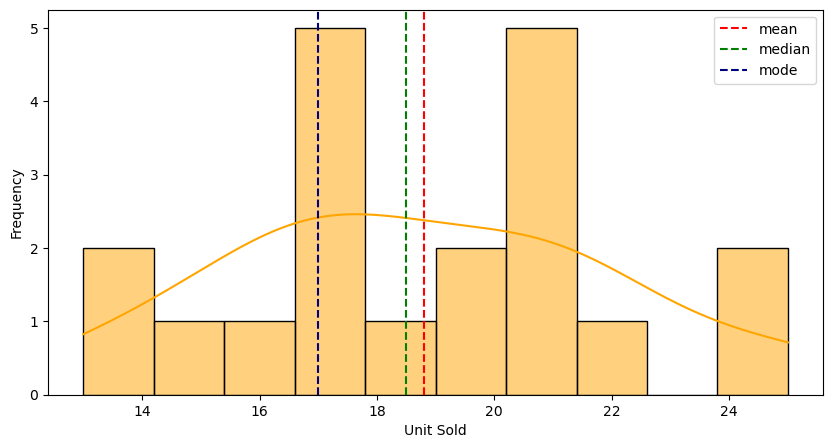

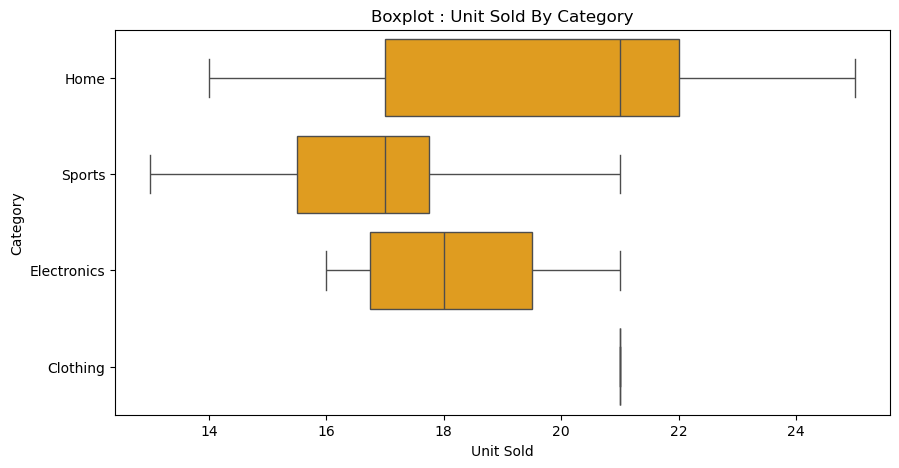

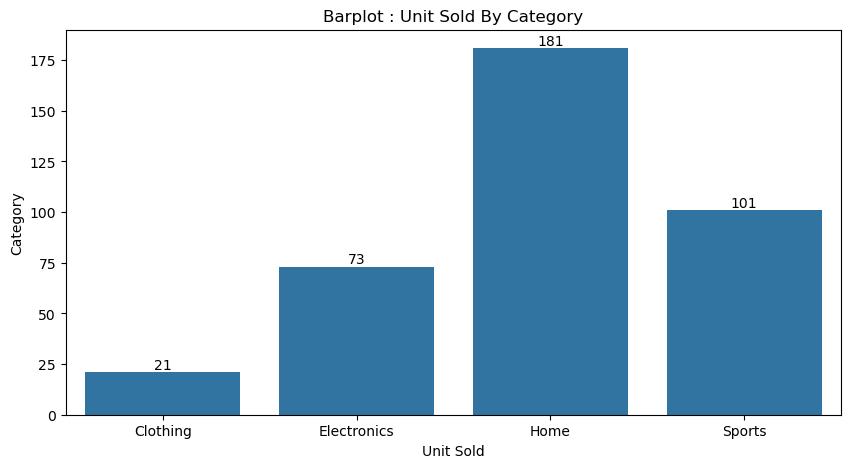

In [92]:
plt.figure(figsize=(10,5))
sns.histplot(sale_df['unit_sold'],bins=10,kde=True,color='orange',edgecolor='black')
plt.xlabel('Unit Sold')
plt.ylabel('Frequency')
plt.axvline(sample_mean , color='red',linestyle='--',label='mean')
plt.axvline(median_unit_sold,color='green',linestyle='--',label='median')
plt.axvline(mode_unit_sold,color='navy',linestyle='--',label='mode')
plt.legend()

# box plot of unit sold 
plt.figure(figsize=(10,5))
sns.boxplot(data=sale_df,x='unit_sold',y='category',color='orange')
plt.title('Boxplot : Unit Sold By Category')
plt.xlabel('Unit Sold')
plt.ylabel('Category')
plt.show()

# Barplot : UNit sold by category 
plt.figure(figsize=(10,5))
ax = sns.barplot(data= cat, x=cat['Category'],y=cat['Total unit sold'], errorbar=None)
plt.title('Barplot : Unit Sold By Category')
plt.xlabel('Unit Sold')
plt.ylabel('Category')
# give the label to the bar 
for label in ax.containers:
    ax.bar_label(label)